In [66]:
#7. Suorita GPS-anturilla vähintään muutaman minuutin mittaus, 
# jonka aikana liikut ulkona kävellen, pyöräillen, rullaluistellen tms. 
# Havaintojesi perusteella:
# a)Piirrä reitti kartalle käyttäen Folium-kirjastoa 
# b)Arvioi havaintojen luotettavuutta tarkastelemalla piirretyn reitin todenmukaisuutta. 
# c)Tarkastele datasta sateliittien määrää (toimii vain Androidilla) ja havaintojen epätarkkuutta. 
# Miten ne näkyvät karttakuvassa 
# d) Laske kuljettu matka käyttäen Haversinen kaavaa.

In [67]:
#Ladataan data
import pandas as pd
import folium
df = pd.read_csv('./Data/GPS_data.csv')
df.head()
# a)Piirrä reitti kartalle käyttäen Folium-kirjastoa 

#Rajataan datasta pois ne rivit, joilla horinsontaalinen (epä)tarkkuus on suuri
#df = df[df['Horizontal Accuracy (m)'] <10] #Rajataan pois arvot, joissa df['Horizontal Accuracy (m)'] > 10

df = df[df['Satellites'] > 30]
df = df.reset_index(drop =True)

#Määritellään "karttapohja", eli kartan keskipiste
lat1 = df['Latitude (°)'].mean() #Latitudin keskiarvo
long1 = df['Longitude (°)'].mean() #Longitudin keskiarvo

#luodaan kartta
my_map = folium.Map(location = [lat1,long1], zoom_start=15)

#Piirretään reitti kartalle:
folium.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'red', weight = 3).add_to(my_map)
my_map.save('Kartta_19.11.2025.html')

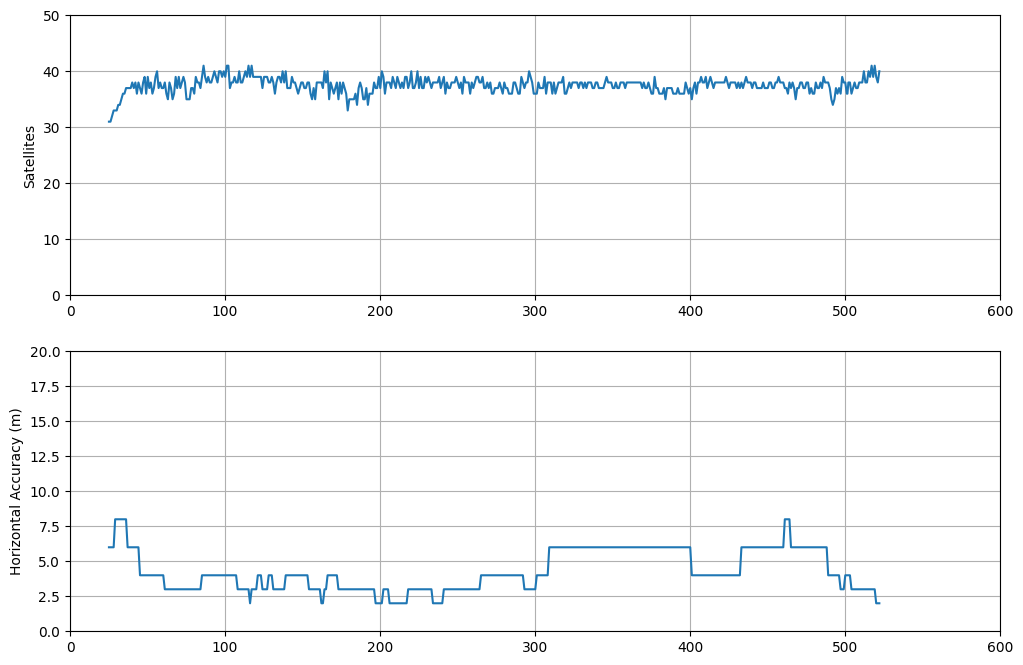

In [68]:
# c)Tarkastele datasta sateliittien määrää (toimii vain Androidilla) ja havaintojen epätarkkuutta. 
# Miten ne näkyvät karttakuvassa 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(df['Time (s)'],df['Satellites'])
plt.ylabel('Satellites')
plt.axis([0,600,0,50])
plt.grid()
plt.subplot(2,1,2)
plt.plot(df['Time (s)'],df['Horizontal Accuracy (m)'])
plt.ylabel('Horizontal Accuracy (m)')
plt.axis([0,600,0,20])
plt.grid()
#df.head()

In [ ]:
# d) Laske kuljettu matka käyttäen Haversinen kaavaa.
#Lasketaan matka käyttäen Haversinen kaava
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

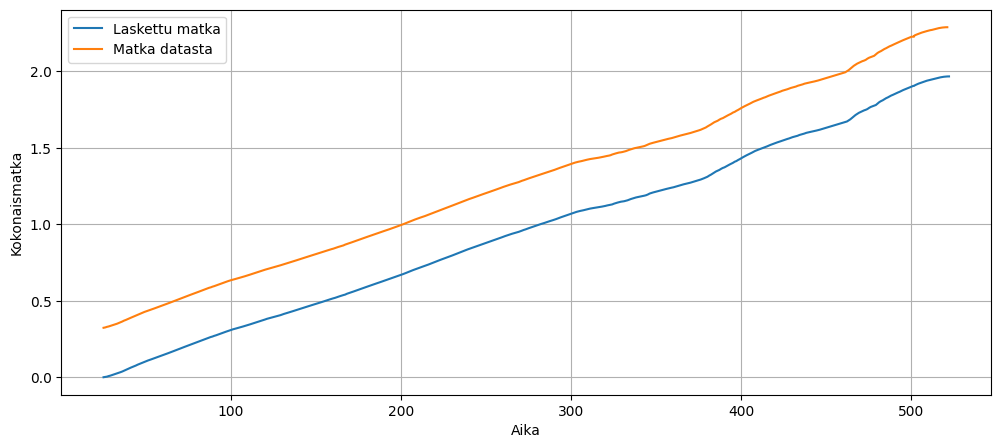

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,Distance_calc,total_distance
0,25.108191,65.055313,25.605700,32.751592,50.239860,0.000000,NaN,0.323403,6.0,6.596993,31.0,0.000000,0.000000
1,26.105642,65.055318,25.605669,32.125305,49.613572,0.000000,NaN,0.325649,6.0,6.645684,31.0,0.001609,0.001609
2,27.115513,65.055328,25.605626,31.598627,49.086893,0.000000,NaN,0.329455,6.0,6.738499,32.0,0.002245,0.003854
3,28.144302,65.055344,25.605555,31.837862,49.326127,2.277767,311.280823,0.332193,6.0,6.787388,33.0,0.003807,0.007660
4,29.111969,65.055358,25.605507,31.161801,48.650066,2.910895,300.983307,0.335891,8.0,6.863519,33.0,0.002738,0.010399


In [70]:
#Lasketaan kuljettu matka
import numpy as np
df['Distance_calc'] = np.zeros(len(df))

#lasketaan väimatka havaintopisteiden välillä käyttäen For-luuppia
for i in range(len(df)-1):
    lon1 = df['Longitude (°)'][i]
    lon2 = df['Longitude (°)'][i+1]
    lat1 = df['Latitude (°)'][i]
    lat2 = df['Latitude (°)'][i+1]
    df.loc[i+1,'Distance_calc'] = haversine(lon1, lat1, lon2, lat2)

#Lasketaan kokonaismatka mittapisteiden välisestä matkasta
df['total_distance'] = df['Distance_calc'].cumsum()
plt.figure(figsize=(12,5))
plt.plot(df['Time (s)'],df['total_distance'])
plt.plot(df['Time (s)'],df['Distance (km)'])
plt.ylabel('Kokonaismatka')
plt.xlabel('Aika')
plt.legend(['Laskettu matka','Matka datasta'])
plt.grid()
plt.show()
df.head()